# Homework Assignment 3
## Regression models

### <p style="text-align: right;"> &#9989; Enzo Cereghino</p>
### <p style="text-align: right;"> &#9989; Enzo-Cereghino</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, November 10th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 79 standard points possible in this assignment. The distribution of points can be found in the section headers**.


---
## Part 1: Git Branch (6 points)

<img src="https://as2.ftcdn.net/v2/jpg/02/31/83/69/1000_F_231836961_dt3tbN1MKbVRGz0RLSnWuC0U8MFeLx8o.jpg" width=300px align="right" style="margin-left: 20px">

For this assignment, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/Enzo-Cereghino/CMSE202-f23-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
## Part 2: Loading the Palmer Penguins Dataset (9 points)

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=400px align="right" style="margin-left: 20px" alt="The Palmer Penguis, image credit: https://allisonhorst.github.io/palmerpenguins/">

For the vast majority of this homework, you'll be working with the Palmer Penguins dataset, which contains measurements of three species of penguins (Adélie, Chinstrap, and Gentoo) collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. 

Note, that while Parts 3, 4, and 5 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3, 4, or 5. To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/penguins_size.csv`

&#9989; **Question 2.1 (1 point)**: **Do this:** Save the `penguins.csv` file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that *would* have downloaded the file.

In [4]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/penguins_size.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13515  100 13515    0     0   143k      0 --:--:-- --:--:-- --:--:--  143k


``` bash
curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/penguins_size.csv -O
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data into a Pandas DataFrame and display the first and last 5 rows. 

In [1]:
# Put your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output 
import time
import random
import statsmodels.api as sm



penguins = pd.read_csv('penguins_size.csv')
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


&#9989;  **Question 2.3 (2 points)**: You should notice that a few of rows have `NaN` values. Some penguins don't like to stay still long enough to be measured <("). Drop these rows from the DataFrame and redisplay the dataframe to show that these rows were removed.

In [2]:
# Put your code here
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


&#9989;  **Question 2.4 (4 points)**: Recall that this dataset has data on three different species of penguins. Although all three species are from the genus Pygoscelis, they are in fact very different. 

**Do This:** Split the data into three new DataFrames, one with just the rows with Adélie penguins, one with just the rows with Chinstrap penguins, and one with just the rows with Gentoo penguins. Display at least one of these DataFrames to convince yourself that your code worked.

In [3]:
# Put your code here
group = penguins.groupby('species')
Adelie = group.get_group('Adelie')
Chinstrap = group.get_group('Chinstrap')
Gentoo = group.get_group('Gentoo')

Adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: One Variable Linear Regression (26 points)

In this part, we'll perform some one-variable linear regression analysis on the penguin data.

&#9989;  **Question 3.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a penguin's body mass using its bill depth and **display the results summary**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

**For this problem, make sure that you're using the full penguin dataset, not just the dataframe for a single species.**

In [4]:
# Put your code here
X = np.array(penguins['body_mass_g'])
Y = np.array(penguins['bill_depth_mm'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

print(results.params)
print(results.summary())

[ 2.20282674e+01 -1.15650334e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     95.68
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.07e-20
Time:                        10:59:39   Log-Likelihood:                -657.24
No. Observations:                 334   AIC:                             1318.
Df Residuals:                     332   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0

&#9989;  **Question 3.2 (3 points)**: Answer the following questions: 

1. What was the equation of the best fit linear relationship between a penguin's body mass and its bill depth?

2. As a penguin's bill depth increases, does its body mass increase or decrease? What tells you this?

3. Based on the $p$-value for the bill depth, is the relationship you found between a penguin's body mass and bill depth statistically significant? Justify yor answer.

<font size=+3>&#9998;</font> 

y = -0.0012x + 22.02

As the bill depth increases the body mass does increase, this is because the slope is positive

The p value is zero so I owuld say that it is statistically significant. A p value of zero means that the dependent variable is closely related to the independant variable

&#9989;  **Question 3.3 (6 points, 2 points per part)**: Now, let's repeat the linear regression, but for each species separately.  It will likely help you later in this question to make sure that the variable names for the OLS model and OLS results are different for each species. That way, you won't overwrite one model with another.

&#9989;  **Question 3.3.Adélie (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict an  **Adélie** penguin's body mass using its bill depth and display the results summary.

In [5]:
# Put your code here
X = np.array(Adelie['body_mass_g'])
Y = np.array(Adelie['bill_depth_mm'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

print(results.params)
print(results.summary())

[1.26306246e+01 1.54246685e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     73.06
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.67e-14
Time:                        10:59:40   Log-Likelihood:                -205.66
No. Observations:                 146   AIC:                             415.3
Df Residuals:                     144   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.630

&#9989;  **Question 3.3.Chinstrap (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a  **Chinstrap** penguin's body mass using its bill depth and display the results summary.

In [6]:
# Put your code here
X = np.array(Chinstrap['body_mass_g'])
Y = np.array(Chinstrap['bill_depth_mm'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

print(results.params)
print(results.summary())

[1.17540512e+01 1.78579681e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     38.01
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.79e-08
Time:                        10:59:40   Log-Likelihood:                -89.156
No. Observations:                  68   AIC:                             182.3
Df Residuals:                      66   BIC:                             186.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.754

&#9989;  **Question 3.3.Gentoo (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a  **Gentoo** penguin's body mass using its bill depth and display the results summary.

In [7]:
# Put your code here
X = np.array(Gentoo['body_mass_g'])
Y = np.array(Gentoo['bill_depth_mm'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

print(results.params)
print(results.summary())

[7.80361041e+00 1.41414651e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     125.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.61e-20
Time:                        10:59:41   Log-Likelihood:                -124.30
No. Observations:                 120   AIC:                             252.6
Df Residuals:                     118   BIC:                             258.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.803

&#9989;  **Question 3.4 (5 points)**: Answer the following questions: 

1. For each of the three species of penguins, what was the equation of the best fit linear relationship between the species' body mass and bill depth?

2. For each of the three species of penguins, as its bill depth increases, does its body mass increase or decrease? 

3. Based on the $p$-values for the bill depth, is the relationship between each species' body mass and bill depth statistically significant?

<font size=+3>&#9998;</font>

Adelie: y = 0.0015x + 12.63

Chinstrap: y = 0.0018x + 11.75

Gentoo: y = 0.0014x + 7.8036

For every penguin the body mass increases with bill depth

The p value for all of them is still zero so I would say yes they are still significant in relation



&#9989;  **Question 3.5 (6 points)**: Assuming you did everything correctly, the relationship between a penguin's body mass and it's bill depth is the opposite when you split the data by species. This might seem confusing to you. Part of the reason for this is because we skipped a very important step regarding dealing with unfamiliar data, that is **visualizing the data**. 

**Do this**: Make a scatterplot showing the penguins' body mass vs. bill depth. Color code the dots so that each species gets a different color. Then, display the best fit line for each of the three species using the same color and display the best fit line for all the penguins using a different color. Don't forget to label your axes. When you're done, you should have a plot that contains three different colors of dots and 4 different lines (3 of the lines should match the colors of the three penguin species, respectively)

**Hint**: We've included a function to help you plot a line. Feel free to use it, or not. 

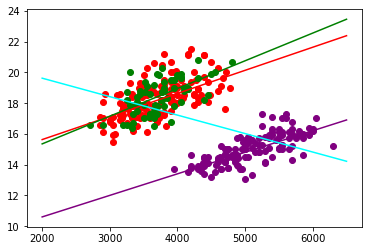

In [8]:
# Put your code here

import matplotlib.pyplot as plt
import numpy as np
def plot_line(slope, intercept, xmin, xmax, color):
    xline = np.array([xmin,xmax])
    yline = slope*xline+intercept
    plt.plot(xline,yline,color)
    
plot_line(0.0015, 12.63, 2000, 6500, 'red')
plot_line(0.0018, 11.75, 2000, 6500, 'green')
plot_line(0.0014, 7.8036, 2000, 6500, 'purple')
plot_line( -0.0012, 22.02, 2000, 6500, 'aqua')
    
    
plt.scatter(Adelie['body_mass_g'], Adelie['bill_depth_mm'],  color = 'red')
plt.scatter(Chinstrap['body_mass_g'], Chinstrap['bill_depth_mm'], color = 'green')
plt.scatter( Gentoo['body_mass_g'], Gentoo['bill_depth_mm'], color = 'purple')



&#9989;  **Question 3.6 (3 points)**: Now that you've visualized the data, can you give an explaination as to why the relationship between a penguin's body mass and bill depth changed drastically when we split the data by species?

<font size=+3>&#9998;</font> Its because the Gentoo has a much smaller bill width compared to the other two species and a higher average body mass. So this makes it seem like there is a downwards trend with bill size and body mass even though by species they all positively correlate

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

## Part 4: Multiple Regression (20 points)

In this part, we'll use multiple features to predict the body mass of a Chinstrap penguin. 

&#9989;  **Question 4.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict a  **Chinstrap** penguin's body mass given just its bill length, bill depth, and flipper length. Be sure to use the `add_constant()` method to ensure `OLS` includes a constant term in its model. As before, make sure to **display a summary of your results**.

In [12]:
# Put your code here
X = sm.add_constant(Chinstrap[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
Y = Chinstrap['body_mass_g']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     21.66
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.48e-10
Time:                        11:04:08   Log-Likelihood:                -476.86
No. Observations:                  68   AIC:                             961.7
Df Residuals:                      64   BIC:                             970.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3157.5301    932.36

In [16]:
intercept = -3157.5301
coeff_bill_length = 16.0392
coeff_bill_depth = 91.5127
coeff_flipper_length = 22.5797

bill_length = 52.0
bill_depth = 20.7
flipper_length = 210.0

predicted_body_mass = (intercept +coeff_bill_length * bill_length +coeff_bill_depth * bill_depth +coeff_flipper_length * flipper_length)

print(predicted_body_mass)

4312.55819


&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Suppose the Chinstrap penguin in the image above has a bill length of 52.0 mm, a bill depth of 20.7 mm, and a flipper length of 210.0 mm. What does your linear model predict the Chinstrap penguin's body mass (in g) is? Explain how you got your answer.



2. For each of the features, specify if it is statistically significant or not. Briefly justify your answers.


<font size=+3>&#9998;</font> 
4312.55819 g. I got my answer by plugging in my coefficents for each of the features multiplying them by the values and them summing them together.

The only one I'd say is not statistically significant is the bill length because it has the highest p value

&#9989;  **Question 4.3 (3 points)**: Perform the same multivariable linear regression again, but this time with just the **two most significant features**. Even if you got that 0, 1, or 3 of the features were significant, just pick the two you think are most significant for this question. Display the summary of these results.

In [20]:
# Put your code here
X = sm.add_constant(Chinstrap[['bill_depth_mm','flipper_length_mm']])
Y = Chinstrap['body_mass_g']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     31.59
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.60e-10
Time:                        11:33:27   Log-Likelihood:                -477.60
No. Observations:                  68   AIC:                             961.2
Df Residuals:                      65   BIC:                             967.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3076.8564    932.74

&#9989;  **Question 4.4 (4 points)**: Answer these questions: 

1. Qualitatively, how much better/worse is the reduced model compared to the original model? Briefly justify your answer.

2. Explain in your own words why we might want to use a model with fewer features, even if it fits the data a bit worse than a model with more features.

<font size=+3>&#9998;</font> 

The r squared value did decrease by getting rid of the bill length in the model. However it did not significantly lower it, still staying rather high around the 0.49 range. This means its slightly worse 

By using fewer features we can better see what the relationship is between the independent and dependent variables. If one isn't statistically significant then it doesnt say much about how its influencing the dependent variable

&#9989;  **Question 4.5 (2 points)**: Suppose we wanted to use the sex of a Chinstrap penguin as a feature to predict its body mass. Will simply including the `sex` column in the second argument to `OLS()` work? If not, why, and what could we do to fix it?

<font size=+3>&#9998;</font> 

It wouldnt work because that is a string and not a value

&#9989;  **Question 4.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/SRs1MRM/Perfect-Model-Chinstrap.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Do this**: Answer These Questions:
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> 

They used body mass as one of the independent varaibles. So its basically saying body mass correlates with body mass.

Their model tells nothing of the other variables so it isn't all that useful. Its telling us something we already know

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

## Part 5: Logistic Regression (18 points)

In this part, we'd like to use logistic regression to classify the species of a penguin given it's body measurements. Logistic regression (as we've learned so far in class) does binary classification. However, we have three species of penguins, and they are not very happy when they are mistaken for another species.

<img src="https://i.redd.it/q09631arghi41.jpg" width="400px">

&#9989;  **Question 5.1 (4 points)**: Let's start by making a classifier to distinguish Adélie penguins from the other two species (Chinstrap penguins and Gentoo penguins). 

**Do This**: Double check that you still have the DataFrame from Question 2.3 intact, i.e. it has data from all three species, but with the NaN rows dropped. Then, create a `Pandas` `Series` called `labels` which takes the `species` column of the DataFrame, but replaces 'Chinstrap' and 'Gentoo' with 0 and replaces 'Adelie' with 1. Also, create a `Pandas` `DataFrame` called `features` which consists of just the four columns bill length, bill depth, flipper length, and body mass. Display the labels and features to make sure you did this correctly.

In [26]:
# Put your code here

labels = penguins['species']

labels = labels.replace('Adelie',1)
labels = labels.replace('Chinstrap',0)
labels = labels.replace('Gentoo',0)

features = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']]

labels, features

(0      1
 1      1
 2      1
 4      1
 5      1
       ..
 338    0
 340    0
 341    0
 342    0
 343    0
 Name: species, Length: 334, dtype: int64,
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 0              39.1           18.7              181.0       3750.0
 1              39.5           17.4              186.0       3800.0
 2              40.3           18.0              195.0       3250.0
 4              36.7           19.3              193.0       3450.0
 5              39.3           20.6              190.0       3650.0
 ..              ...            ...                ...          ...
 338            47.2           13.7              214.0       4925.0
 340            46.8           14.3              215.0       4850.0
 341            50.4           15.7              222.0       5750.0
 342            45.2           14.8              212.0       5200.0
 343            49.9           16.1              213.0       5400.0
 
 [334 rows x 4 columns])

&#9989;  **Question 5.2 (4 points)**: Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [59]:
# Put your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_vectors, test_vectors, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, train_size = 0.75, random_state = 0)


print('Vector shape:')
print(train_vectors.shape)
print(test_vectors.shape)


print('Label Shape:')
print(train_labels.shape)
print(test_labels.shape)


Vector shape:
(250, 4)
(84, 4)
Label Shape:
(250,)
(84,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [49]:
# Put your code here
logit_model = sm.Logit(train_labels, train_vectors)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.017223
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  250
Model:                          Logit   Df Residuals:                      246
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.9746
Time:                        11:53:18   Log-Likelihood:                -4.3056
converged:                       True   LL-Null:                       -169.74
Covariance Type:            nonrobust   LLR p-value:                 2.065e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
bill_length_mm       -3.9752      2.085     -1.906      0.057      -8.062       0.112
bill_de

&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [70]:
# Put your code here
y_pred = result.predict(test_vectors)
y_pred = (y_pred > 0.5).astype(int)

errors = 0

for i in range(len(y_pred)):
    if y_pred.iloc[i] != test_labels.iloc[i]:
        errors +=1

correctly_predicted = len(y_pred) /(len(y_pred)+errors)
print('The percent of correctly predicted labels is:', correctly_predicted*100, "%" )

The percent of correctly predicted labels is: 98.82352941176471 %


&#9989;  **Question 5.5 (2 points)**: If everything worked correctly, you should have a classifier that can distinguish Adélie penguins from the other two species with high accuracy! Now, suppose you wanted to write code that would take a penguins measurements (bill length, bill depth, flipper length, and body mass) and predict which of the three species the penguin was. Describe how you would do this. **Note**: You don't need to actually implement this with code, you simply need to have a sufficiently detailed plan for how you *could* do it. 

<font size=+3>&#9998;</font> 

To make the distinction between the three different types of penguins you could have three logistic models that each check to see if the 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/UsXJF7EeNY" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

<img src=https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/penguins_cran.png width=200px>

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University